<a href="https://colab.research.google.com/github/nataliepham6720/16-745_Optimal_Control/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

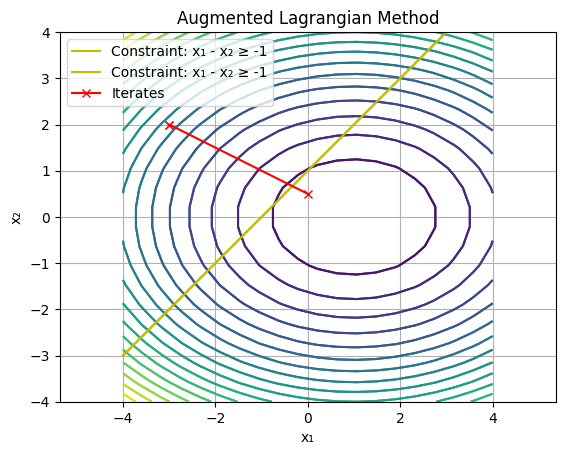

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------------
# Define objective and its derivatives
# -----------------------------------
Q = np.diag([0.5, 1.0])
x_star = np.array([1.0, 0.0])

def f(x):
    x = np.asarray(x)
    return 0.5 * (x - x_star).T @ Q @ (x - x_star)

def grad_f(x):
    return Q @ (x - x_star)

def hess_f(x):
    return Q

# -----------------------------------
# Define constraint and its gradient
# -----------------------------------
A = np.array([1.0, -1.0])
b = -1.0

def c(x):
    return A @ x - b

def dc(x):
    return A.reshape(1, -1)  # shape (1, 2)

# -----------------------------------
# Plot landscape with constraint
# -----------------------------------
def plot_landscape():
    Nsamp = 20
    Xsamp, Ysamp = np.meshgrid(np.linspace(-4, 4, Nsamp), np.linspace(-4, 4, Nsamp))
    Zsamp = np.zeros_like(Xsamp)
    for j in range(Nsamp):
        for k in range(Nsamp):
            Zsamp[j, k] = f(np.array([Xsamp[j, k], Ysamp[j, k]]))
    plt.contour(Xsamp, Ysamp, Zsamp, levels=20)

    xc = np.linspace(-4, 3, Nsamp)
    yc = xc + 1
    plt.plot(xc, yc, 'y', label='Constraint: x₁ - x₂ ≥ -1')
    plt.axis('equal')

# -----------------------------------
# Augmented Lagrangian (for plotting/debug)
# -----------------------------------
def La(x, λ, ρ):
    p = max(0, c(x))
    return f(x) + λ * p + 0.5 * ρ * p**2

# -----------------------------------
# Newton solver for equality-constrained step
# -----------------------------------
def newton_solve(x0, λ, ρ):
    x = np.array(x0)
    while True:
        p = max(0.0, c(x))
        if c(x) >= 0:
            C = dc(x)
        else:
            C = np.zeros((1, 2))

        g = grad_f(x) + (λ + ρ * p) * C.T.flatten()
        if np.linalg.norm(g) < 1e-8:
            break
        H = hess_f(x) + ρ * (C.T @ C)
        Δx = -np.linalg.solve(H, g)
        x = x + Δx
    return x

# -----------------------------------
# Run ALM steps
# -----------------------------------
xguess = [np.array([-3.0, 2.0])]
λguess = [0.0]
ρ = 1.0

plot_landscape()
plt.plot(xguess[-1][0], xguess[-1][1], "rx")

# Run one ALM step
xnew = newton_solve(xguess[-1], λguess[-1], ρ)
λnew = max(0.0, λguess[-1] + ρ * c(xnew))
xguess.append(xnew)
λguess.append(λnew)
ρ *= 10

# Plot result
plot_landscape()
xs = np.array(xguess)
plt.plot(xs[:, 0], xs[:, 1], "rx-", label="Iterates")
plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Augmented Lagrangian Method")
plt.grid(True)
plt.show()


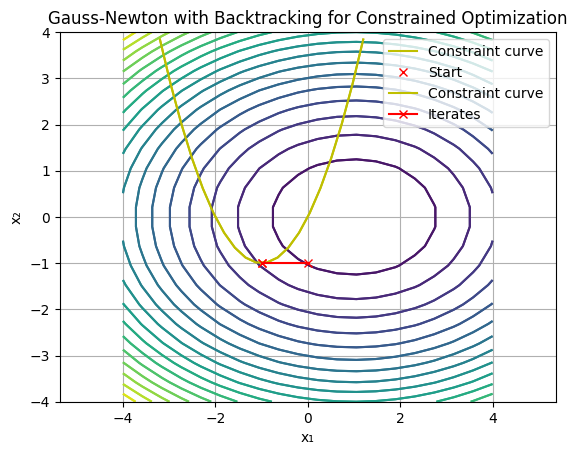

Final α = 0.5


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Objective and Derivatives
# -------------------------
Q = np.diag([0.5, 1.0])
x_star = np.array([1.0, 0.0])

def f(x):
    return 0.5 * (x - x_star).T @ Q @ (x - x_star)

def grad_f(x):
    return Q @ (x - x_star)

def hess_f(x):
    return Q

# -------------------------
# Nonlinear Constraint
# -------------------------
def c(x):
    return x[0]**2 + 2*x[0] - x[1]

def dc(x):
    # Gradient ∂c/∂x: [2x₁ + 2, -1]
    return np.array([2*x[0] + 2, -1.0]).reshape(1, -1)  # shape (1, 2)

# -------------------------
# Plotting
# -------------------------
def plot_landscape():
    Nsamp = 20
    x1 = np.linspace(-4, 4, Nsamp)
    x2 = np.linspace(-4, 4, Nsamp)
    Xsamp, Ysamp = np.meshgrid(x1, x2)
    Zsamp = np.zeros_like(Xsamp)
    for j in range(Nsamp):
        for k in range(Nsamp):
            Zsamp[j, k] = f(np.array([Xsamp[j, k], Ysamp[j, k]]))
    plt.contour(Xsamp, Ysamp, Zsamp, levels=20)

    xc = np.linspace(-3.2, 1.2, Nsamp)
    yc = xc**2 + 2 * xc
    plt.plot(xc, yc, 'y', label="Constraint curve")
    plt.axis("equal")

# -------------------------
# Gauss-Newton Step
# -------------------------
def gauss_newton_step(x, lam):
    H = hess_f(x)
    C = dc(x)
    # Changed C.T @ lam to C.T * lam for scalar lam
    # Ensure the first element of concatenation is flattened and the term C.T * lam is also flattened
    rhs = -np.concatenate([(grad_f(x) + (C.T * lam).flatten()), [c(x)]])
    KKT = np.block([[H, C.T],
                    [C, np.zeros((1, 1))]])
    delta = np.linalg.solve(KKT, rhs)
    Δx = delta[:2]
    Δλ = delta[2]
    return Δx, Δλ

# The rest of the code remains the same.
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Objective and Derivatives
# -------------------------
Q = np.diag([0.5, 1.0])
x_star = np.array([1.0, 0.0])

def f(x):
    return 0.5 * (x - x_star).T @ Q @ (x - x_star)

def grad_f(x):
    return Q @ (x - x_star)

def hess_f(x):
    return Q

# -------------------------
# Nonlinear Constraint
# -------------------------
def c(x):
    return x[0]**2 + 2*x[0] - x[1]

def dc(x):
    # Gradient ∂c/∂x: [2x₁ + 2, -1]
    return np.array([2*x[0] + 2, -1.0]).reshape(1, -1)  # shape (1, 2)

# -------------------------
# Plotting
# -------------------------
def plot_landscape():
    Nsamp = 20
    x1 = np.linspace(-4, 4, Nsamp)
    x2 = np.linspace(-4, 4, Nsamp)
    Xsamp, Ysamp = np.meshgrid(x1, x2)
    Zsamp = np.zeros_like(Xsamp)
    for j in range(Nsamp):
        for k in range(Nsamp):
            Zsamp[j, k] = f(np.array([Xsamp[j, k], Ysamp[j, k]]))
    plt.contour(Xsamp, Ysamp, Zsamp, levels=20)

    xc = np.linspace(-3.2, 1.2, Nsamp)
    yc = xc**2 + 2 * xc
    plt.plot(xc, yc, 'y', label="Constraint curve")
    plt.axis("equal")

# -------------------------
# Gauss-Newton Step
# -------------------------
def gauss_newton_step(x, lam):
    H = hess_f(x)
    C = dc(x)
    # Changed C.T @ lam to C.T * lam for scalar lam
    # Ensure the first element of concatenation is flattened and the term C.T * lam is also flattened
    rhs = -np.concatenate([(grad_f(x) + (C.T * lam).flatten()), [c(x)]])
    KKT = np.block([[H, C.T],
                    [C, np.zeros((1, 1))]])
    delta = np.linalg.solve(KKT, rhs)
    Δx = delta[:2]
    Δλ = delta[2]
    return Δx, Δλ

# -------------------------
# Augmented Lagrangian
# -------------------------
ρ = 1.0
def P(x, lam):
    return f(x) + lam * c(x) + 0.5 * ρ * c(x)**2

def grad_P(x, lam):
    # Calculate the gradient with respect to x
    # dc(x).T has shape (2, 1). Multiplying by a scalar (lam + ρ * c(x)) results in (2, 1).
    # To add it to grad_f(x) which is (2,), we can either explicitly reshape or rely on broadcasting
    # as long as the intended operation is element-wise scaling and then vector addition.
    # Let's ensure it's a (2,) vector for clarity.
    gradL_x = grad_f(x) + (dc(x).T * (lam + ρ * c(x))).flatten()

    # Gradient with respect to lambda
    gradL_λ = c(x)

    # Concatenate the two parts of the gradient vector [∂P/∂x, ∂P/∂λ]
    # gradL_x is (2,), gradL_λ is a scalar which we make a list [scalar] -> (1,)
    return np.concatenate([gradL_x, [gradL_λ]])

# -------------------------
# Initialization and Plot
# -------------------------
xguess = [np.array([-1.0, -1.0])]
λguess = [0.0]

plot_landscape()
plt.plot(xguess[-1][0], xguess[-1][1], "rx", label="Start")

# -------------------------
# Gauss-Newton + Backtracking
# -------------------------
Δx, Δλ = gauss_newton_step(xguess[-1], λguess[-1])
α = 1.0
direction = np.concatenate([Δx, [Δλ]])

# Ensure P and grad_P handle scalar lam correctly in the condition
while P(xguess[-1] + α * Δx, λguess[-1] + α * Δλ) > P(xguess[-1], λguess[-1]) + 0.01 * α * grad_P(xguess[-1], λguess[-1]).dot(direction):
    α *= 0.5

x_next = xguess[-1] + α * Δx
λ_next = λguess[-1] + α * Δλ

xguess.append(x_next)
λguess.append(λ_next)

# -------------------------
# Final Plot
# -------------------------
plot_landscape()
x_hist = np.array(xguess)
plt.plot(x_hist[:, 0], x_hist[:, 1], "rx-", label="Iterates")
plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Gauss-Newton with Backtracking for Constrained Optimization")
plt.grid(True)
plt.show()

print(f"Final α = {α}")

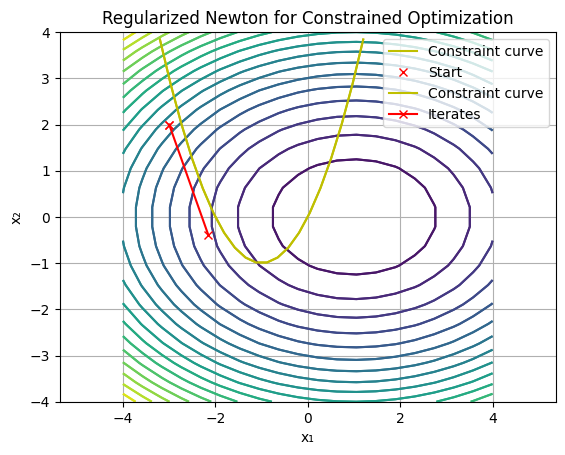

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# Objective and Derivatives
# -------------------------
Q = np.diag([0.5, 1.0])
x_star = np.array([1.0, 0.0])

def f(x):
    return 0.5 * (x - x_star).T @ Q @ (x - x_star)

def grad_f(x):
    return Q @ (x - x_star)

def hess_f(x):
    return Q

# -------------------------
# Nonlinear Constraint
# -------------------------
def c(x):
    return x[0]**2 + 2*x[0] - x[1]

def dc(x):
    # ∂c/∂x: [2x₁ + 2, -1]
    return np.array([2*x[0] + 2, -1.0]).reshape(1, -1)  # shape (1,2)

def dcdx_lambda_jacobian(x, lam):
    """Jacobian of dc(x).T @ lambda wrt x"""
    return lam * np.array([[2.0, 0],
                           [0.0, 0.0]])  # only x[0] component affects ∂²c/∂x²

# -------------------------
# Plotting
# -------------------------
def plot_landscape():
    Nsamp = 20
    x1 = np.linspace(-4, 4, Nsamp)
    x2 = np.linspace(-4, 4, Nsamp)
    Xsamp, Ysamp = np.meshgrid(x1, x2)
    Zsamp = np.zeros_like(Xsamp)
    for j in range(Nsamp):
        for k in range(Nsamp):
            Zsamp[j, k] = f(np.array([Xsamp[j, k], Ysamp[j, k]]))
    plt.contour(Xsamp, Ysamp, Zsamp, levels=20)

    xc = np.linspace(-3.2, 1.2, Nsamp)
    yc = xc**2 + 2 * xc
    plt.plot(xc, yc, 'y', label="Constraint curve")
    plt.axis("equal")

# -------------------------
# Newton Step
# -------------------------
def newton_step(x, lam):
    H = hess_f(x) + dcdx_lambda_jacobian(x, lam)
    C = dc(x)
    KKT = np.block([[H, C.T],
                    [C, np.zeros((1, 1))]])
    rhs = -np.concatenate([grad_f(x) + C.T @ lam, [c(x)]])
    Δz = np.linalg.solve(KKT, rhs)
    Δx = Δz[:2]
    Δλ = Δz[2]
    return Δx, Δλ

# -------------------------
# Regularized Newton Step
# -------------------------
def regularized_newton_step(x, lam):
    β = 1.0
    H = hess_f(x) + dcdx_lambda_jacobian(x, lam)
    C = dc(x)
    n, m = len(x), 1
    K = np.block([[H, C.T],
                  [C, np.zeros((1, 1))]])

    e = np.linalg.eigvalsh(K)
    # Correct the condition check for positive and negative eigenvalues
    # The KKT matrix structure for inequality constraints (which this appears to handle based on P and grad_P in ipython-input-9)
    # is often structured for indefinite systems. The provided eigenvalue check (n positive, m negative)
    # is typically for equality constrained problems or specific reformulations.
    # For this specific error, we focus on the matrix multiplication.
    # The condition `not (np.sum(e > 0) == n and np.sum(e < 0) == m)` might need adjustment based on the specific problem formulation.
    # However, for the purpose of fixing the matmul error, we leave this condition as is.
    while not (np.sum(e > 0) == n and np.sum(e < 0) == m):
        reg = np.diag(np.concatenate([β * np.ones(n), -β * np.ones(m)]))
        K += reg
        e = np.linalg.eigvalsh(K)

    # Change @ to * and flatten the result for element-wise multiplication with the scalar lam
    rhs = -np.concatenate([grad_f(x) + (C.T * lam).flatten(), [c(x)]])
    Δz = np.linalg.solve(K, rhs)
    Δx = Δz[:2]
    Δλ = Δz[2]
    return Δx, Δλ

# -------------------------
# Run and Plot
# -------------------------
xguess = [np.array([-3.0, 2.0])]
λguess = [0.0]

plot_landscape()
plt.plot(xguess[-1][0], xguess[-1][1], "rx", label="Start")

# Regularized Newton step
Δx, Δλ = regularized_newton_step(xguess[-1], λguess[-1])
xnext = xguess[-1] + Δx
λnext = λguess[-1] + Δλ

xguess.append(xnext)
λguess.append(λnext)

# Final plot
plot_landscape()
x_hist = np.array(xguess)
plt.plot(x_hist[:, 0], x_hist[:, 1], "rx-", label="Iterates")
plt.legend()
plt.xlabel("x₁")
plt.ylabel("x₂")
plt.title("Regularized Newton for Constrained Optimization")
plt.grid(True)
plt.show()